In [2]:
#importing few common modules for the instructions provided.

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# To download the Data

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
  # Creating a Test Set
np.random.seed(42)

In [14]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [18]:
len(test_set)

4128

In [20]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [22]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [24]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [26]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [28]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [30]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [32]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [34]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

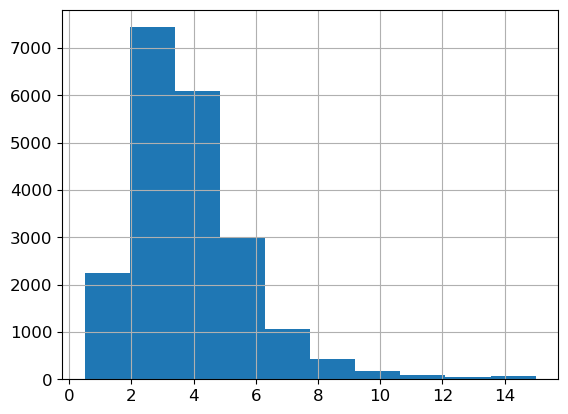

In [36]:
housing["median_income"].hist()

In [38]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [40]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

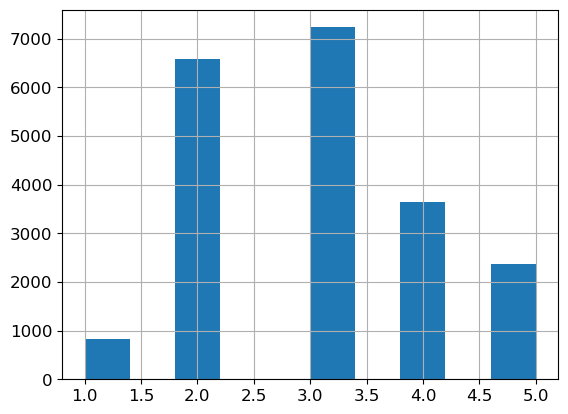

In [42]:
housing["income_cat"].hist()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [46]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [48]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [50]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [52]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [54]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [56]:
housing = strat_train_set.copy()

In [58]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [60]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [62]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [66]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [68]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [70]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [72]:
#Check that this is the same as manually computing the median of each attribute:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [74]:
#Transform the training set:
X = imputer.transform(housing_num)

In [76]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [78]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [80]:
imputer.strategy

'median'

In [82]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [84]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [86]:
#Managing Text and Categorical Attributes
#Next, we'll preprocess the categorical feature, ocean_proximity:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [88]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [90]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [92]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [96]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [98]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [100]:
#Transformation Pipelines

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [104]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [106]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [108]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [110]:
housing_prepared.shape

(16512, 16)

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [114]:
#Choosing and Training a Model: Training and Evaluation on the Training Set

In [116]:
#linear reggresor

In [118]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [120]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [122]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

In [124]:
#DecisionTreeRegressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [168]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [170]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error(housing_labels, housing_predictions)
tree_mae

0.0

In [172]:
#Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [136]:
from sklearn.metrics import mean_squared_error

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [176]:
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_mae

0.0

In [178]:
#Support Vector Machine Regressor

In [180]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [182]:
from sklearn.metrics import mean_squared_error

housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

In [184]:
from sklearn.metrics import mean_absolute_error

svm_mae = mean_absolute_error(housing_labels, housing_predictions)
svm_mae

81843.53472284484

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these values have been computed as per your code
lin_rmse = 68627.87390018745
lin_mae =  49438.66860915802 
tree_rmse = 0 
tree_mae = 0
forest_rmse = 18650.698705770003
forest_mae = 12061.519983648257
svm_rmse = 111095.06635291968
svm_mae = 81843.53472284484
# Data for RMSE
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM']
rmse_values = [lin_rmse, tree_rmse, forest_rmse, svm_rmse]

# Data for MAE
mae_values = [lin_mae, tree_mae, forest_mae, svm_mae]


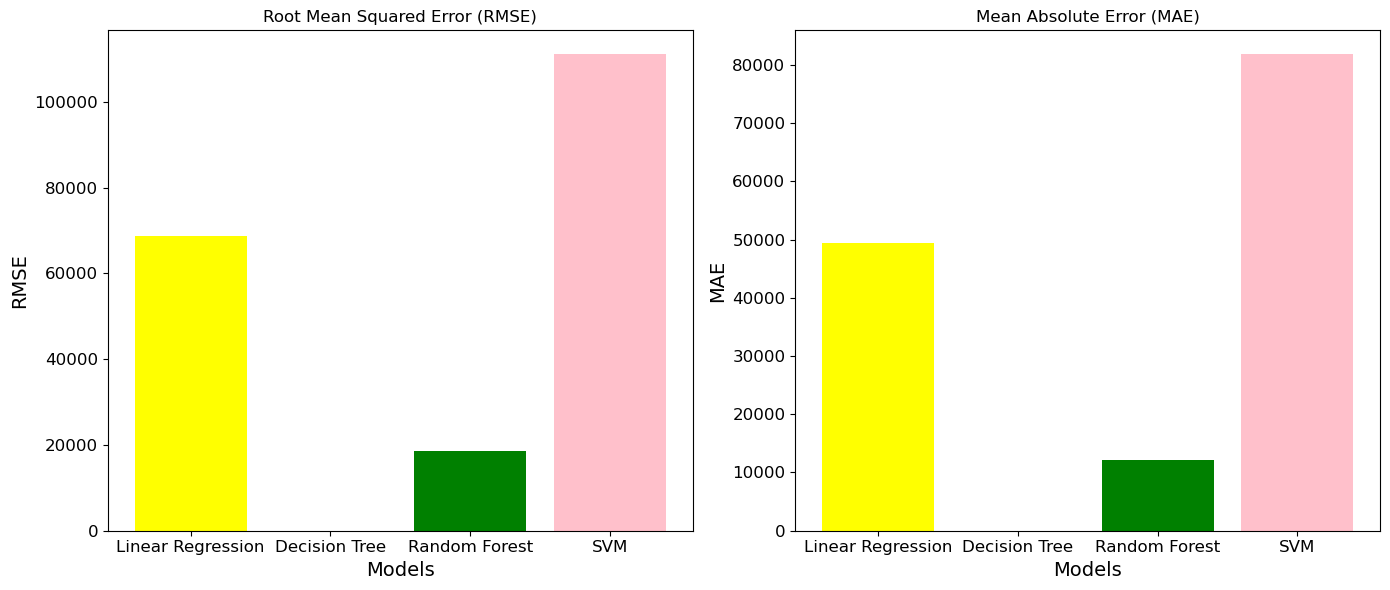

In [188]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Bar Chart
ax[0].bar(models, rmse_values, color=['yellow', 'orange', 'green', 'pink'])
ax[0].set_title('Root Mean Squared Error (RMSE)')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Models')

# MAE Bar Chart
ax[1].bar(models, mae_values, color=['yellow', 'orange', 'green', 'pink'])
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')
ax[1].set_xlabel('Models')

# Show the plots
plt.tight_layout()
plt.show()


In [190]:
#Better Evaluation Using Cross-Validation

In [192]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [194]:
#Decision Tree

In [196]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [198]:
#Linear_regression

In [200]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


In [202]:
#RandomForestRegressor

In [204]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [206]:
#Support Vector Machine

In [208]:
svm_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


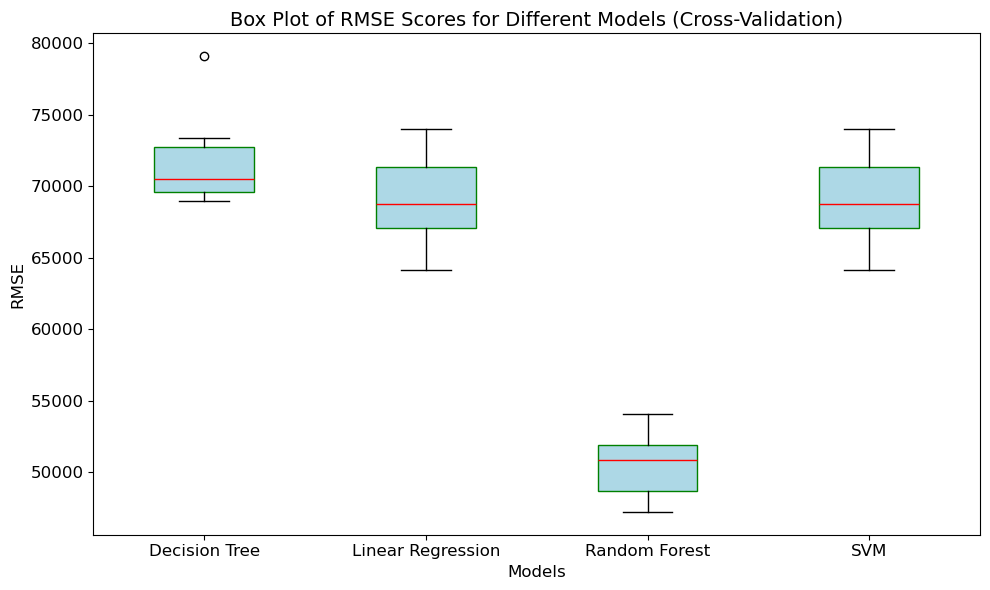

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE Scores for each model (from cross-validation results)
tree_rmse_scores = np.array([72831.45749112, 69973.18438322, 69528.56551415, 72517.78229792,
                             69145.50006909, 79094.74123727, 68960.045444, 73344.50225684,
                             69826.02473916, 71077.09753998])

lin_rmse_scores = np.array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
                            66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
                            66443.28836884, 70139.79923956])

forest_rmse_scores = np.array([51559.63379638, 48737.57100062, 47210.51269766, 51875.21247297,
                               47577.50470123, 51863.27467888, 52746.34645573, 50065.1762751,
                               48664.66818196, 54055.90894609])

# Assuming the SVM scores are same as Linear Regression in your example (correct if needed)
svm_rmse_scores = np.array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
                            66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
                            66443.28836884, 70139.79923956])

# Combine scores for the boxplot
data = [tree_rmse_scores, lin_rmse_scores, forest_rmse_scores, svm_rmse_scores]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Decision Tree', 'Linear Regression', 'Random Forest', 'SVM'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='green'),
            medianprops=dict(color='red'))

# Add title and labels
plt.title('Box Plot of RMSE Scores for Different Models (Cross-Validation)', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Models', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [212]:
#Fine-Tuning the model (grid searcch)

In [214]:
#RandomForestRegressor 

In [216]:
    from sklearn.model_selection import GridSearchCV
    
    param_grid = [
        # try 12 (3×4) combinations of hyperparameters
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        # then try 6 (2×3) combinations with bootstrap set as False
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
      ]
    
    forest_reg = RandomForestRegressor(random_state=42)
    # train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
    grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
    grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [218]:
##The best hyperparameter combination found:

In [220]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [222]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cvres_rand_grid = grid_search.cv_results_
for mean_score, params in zip(cvres_rand_grid["mean_test_score"], cvres_rand_grid["params"]):
   print(np.sqrt(-mean_score), params)

In [232]:
#LinearRegression

In [234]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Ridge regression
param_grid_ridge = [
    {'alpha': [0.1, 1.0, 10.0, 100.0]}
]

# Use Ridge instead of LinearRegression
ridge_reg = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_reg, param_grid_ridge, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model to your data
grid_search.fit(housing_prepared, housing_labels)

# To see the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# To see the best estimator
best_ridge = grid_search.best_estimator_

Best parameters: {'alpha': 10.0}


In [236]:
best_params = grid_search.best_params_

In [238]:
best_lin_reg = grid_search.best_estimator_

In [240]:
print("Best parameters:", best_params)
print("Best estimator:", best_lin_reg)

Best parameters: {'alpha': 10.0}
Best estimator: Ridge(alpha=10.0)


In [246]:
cvres_linear_reg = grid_search.cv_results_
for mean_score, params in zip(cvres_linear_reg["mean_test_score"], cvres_linear_reg["params"]):
    print(np.sqrt(-mean_score), params)

69077.26727067208 {'alpha': 0.1}
69076.70631028565 {'alpha': 1.0}
69070.40042665186 {'alpha': 10.0}
69077.18726828668 {'alpha': 100.0}


In [248]:
#DecisionTreeRegressor

In [250]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = [
    {'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
]

# Initialize the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model to your data
grid_search.fit(housing_prepared, housing_labels)

# To see the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# To see the best estimator
best_tree = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [252]:
best_params = grid_search.best_params_

In [254]:
best_tree_reg = grid_search.best_estimator_

In [256]:
print("Best parameters:", best_params)
print("Best estimator:", best_tree_reg)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best estimator: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)


In [258]:
cvres_tree_reg = grid_search.cv_results_
for mean_score, params in zip(cvres_tree_reg["mean_test_score"], cvres_tree_reg["params"]):
    print(np.sqrt(-mean_score), params)

62739.780496000894 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
62245.87069019278 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
62056.24290857084 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
62104.64918407395 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
61984.46207012795 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
61441.51210059229 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
60888.77036981926 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
60888.77036981926 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
60719.76756146998 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
70437.13337621602 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
68694.36421530819 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
66166.71922375867 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [260]:
#SVR

In [318]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

# To see the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# To see the best estimator
best_svr = grid_search.best_estimator_



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.6s
[CV] END .............................C=100.0, kernel=linear; total time=   7.1s
[CV] END .............................C=100.0, 

In [320]:
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

Best parameters: {'C': 30000.0, 'kernel': 'linear'}
Best estimator: SVR(C=30000.0, kernel='linear')


In [324]:
cvres_svr = grid_search.cv_results_
for mean_score, params in zip(cvres_svr["mean_test_score"], cvres_svr["params"]):
   print(np.sqrt(-mean_score), params)

84649.6069847477 {'C': 10.0, 'kernel': 'linear'}
75457.08963266957 {'C': 30.0, 'kernel': 'linear'}
71635.55360917222 {'C': 100.0, 'kernel': 'linear'}
70677.86808390004 {'C': 300.0, 'kernel': 'linear'}
70396.4975696743 {'C': 1000.0, 'kernel': 'linear'}
70323.59018834525 {'C': 3000.0, 'kernel': 'linear'}
70292.4276504136 {'C': 10000.0, 'kernel': 'linear'}
70286.6183460516 {'C': 30000.0, 'kernel': 'linear'}
118819.34364522224 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
118699.17654811458 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
118643.66544284696 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118772.67744039097 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
118898.89058474178 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
118933.05253182865 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
118601.87638476977 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
118270.77280181898 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
118092.00656626429 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
118460.8070829649 {'C': 3.0, 'gamma': 0

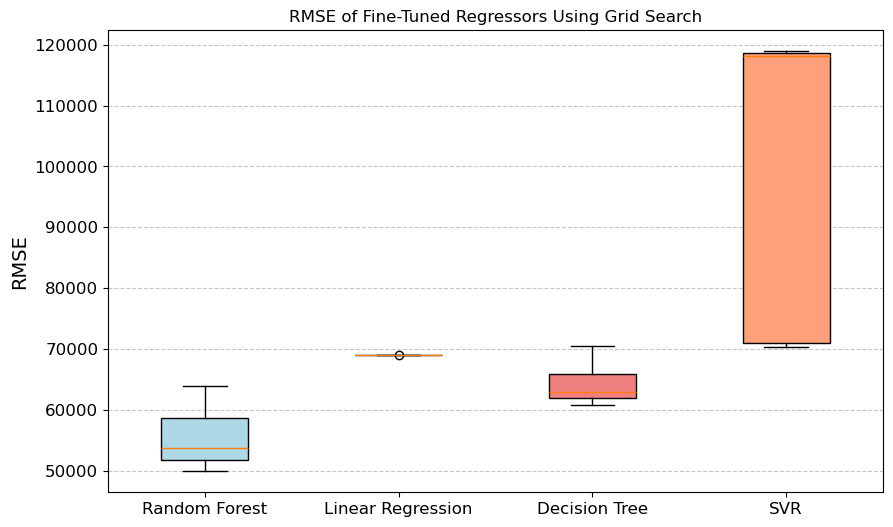

In [326]:
import numpy as np
import matplotlib.pyplot as plt

# Storing RMSE values for each regressor
rmse_random_forest = [
    63895.16, 54916.32, 52885.87, 60075.37, 52495.01, 50187.24, 58064.74, 51519.32,
    49969.80, 58895.82, 52459.80, 49898.99, 62381.77, 54476.57, 59974.60, 52754.56,
    57831.14, 51278.38
]
rmse_linear_regression = [69077.27, 69076.71, 69070.40, 69077.19]
rmse_decision_tree = [
    62739.78, 62245.87, 62056.24, 62104.65, 61984.46, 61441.51, 60888.77, 60888.77,
    60719.77, 70437.13, 68694.36, 66166.72, 68422.60, 67802.31, 65236.83, 63832.27,
    63832.27, 63133.15
]
rmse_svr = [
    84649.61, 75457.09, 71635.55, 70677.87, 70396.50, 70323.59, 70292.43, 70286.62,
    118819.34, 118699.18, 118643.67, 118772.68, 118898.89, 118933.05, 118601.88, 118270.77,
    118092.01, 118460.81
]

# Combining all RMSE values into a list
rmse_values = [rmse_random_forest, rmse_linear_regression, rmse_decision_tree, rmse_svr]
regressor_names = ["Random Forest", "Linear Regression", "Decision Tree", "SVR"]

# Creating the box plot with customized colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

plt.figure(figsize=(10, 6))
box = plt.boxplot(rmse_values, labels=regressor_names, patch_artist=True)

# Applying colors to the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("RMSE")
plt.title("RMSE of Fine-Tuned Regressors Using Grid Search")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [191]:
##pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.199323,0.028645,0.008948,0.007375,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.565079,0.014365,0.021723,0.007925,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,1.581835,0.126188,0.056773,0.006506,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.287041,0.005972,0.007149,0.007589,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.933879,0.080166,0.022200,0.008576,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,2.633470,0.163324,0.056349,0.007077,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.368738,0.015967,0.012500,0.006250,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,1.148505,0.144297,0.015606,0.009860,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,3.714926,0.168590,0.049995,0.006251,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.492397,0.012146,0.015628,0.000015,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


In [ ]:
#Randomized Search

In [196]:
#RandomForestRegressor

In [281]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002151D3A9FA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002151AAE9820>},
                   random_state=42, scoring='neg_mean_squared_error')

In [283]:
cvres_forest_rand = rnd_search.cv_results_
for mean_score, params in zip(cvres_forest_rand["mean_test_score"], cvres_forest_rand["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [ ]:
#Linear Regressor

In [285]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions for Ridge Regression
param_distribs = {
    'alpha': uniform(loc=0, scale=10),  # Range for regularization strength
    'fit_intercept': [True, False]      # Whether to calculate the intercept for this model
}

# Instantiate a Ridge regressor
ridge_reg = Ridge(random_state=42)

# Set up RandomizedSearchCV
rnd_search = RandomizedSearchCV(ridge_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
                                
# Fit the model to the data
rnd_search.fit(housing_prepared, housing_labels)

# Get the best parameters
print(rnd_search.best_params_)


{'alpha': 5.986584841970366, 'fit_intercept': True}


In [287]:
cvres_linear_rand = rnd_search.cv_results_
for mean_score, params in zip(cvres_linear_rand["mean_test_score"], cvres_linear_rand["params"]):
    print(np.sqrt(-mean_score), params)

69074.7083042563 {'alpha': 3.745401188473625, 'fit_intercept': True}
69166.26063702338 {'alpha': 1.834347898661638, 'fit_intercept': False}
69073.08159853352 {'alpha': 5.986584841970366, 'fit_intercept': True}
69074.18356426693 {'alpha': 4.458327528535912, 'fit_intercept': True}
69166.50688682607 {'alpha': 0.5808361216819946, 'fit_intercept': False}
69165.80439674595 {'alpha': 3.337086111390218, 'fit_intercept': False}
69165.13125117465 {'alpha': 7.080725777960454, 'fit_intercept': False}
69166.50739835862 {'alpha': 0.5641157902710026, 'fit_intercept': False}
69165.15162420971 {'alpha': 8.324426408004218, 'fit_intercept': False}
69166.43358431317 {'alpha': 0.007787658410143283, 'fit_intercept': False}


In [289]:
#DecisionTreeRegressor

In [291]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for DecisionTreeRegressor
param_distribs = {
    'max_depth': randint(1, 20),                   # Depth of the tree
    'min_samples_split': randint(2, 20),           # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),            # Minimum number of samples required to be at a leaf node
    'max_features': randint(1, housing_prepared.shape[1] + 1)  # Number of features to consider when looking for the best split
}

# Instantiate a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Set up RandomizedSearchCV
rnd_search = RandomizedSearchCV(tree_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the model to the data
rnd_search.fit(housing_prepared, housing_labels)

# Get the best parameters
print(rnd_search.best_params_)


{'max_depth': 16, 'max_features': 15, 'min_samples_leaf': 15, 'min_samples_split': 13}


In [293]:
cvres_decision_rand = rnd_search.cv_results_
for mean_score, params in zip(cvres_decision_rand["mean_test_score"], cvres_decision_rand["params"]):
    print(np.sqrt(-mean_score), params)

68463.03382170892 {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 12}
61325.73068220276 {'max_depth': 8, 'max_features': 13, 'min_samples_leaf': 7, 'min_samples_split': 12}
60923.784542858106 {'max_depth': 11, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 9}
89690.35377873268 {'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 13}
75843.79857045546 {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 13}
59444.35421292752 {'max_depth': 12, 'max_features': 9, 'min_samples_leaf': 17, 'min_samples_split': 11}
59372.80336861544 {'max_depth': 16, 'max_features': 15, 'min_samples_leaf': 15, 'min_samples_split': 13}
86636.20686303898 {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 19, 'min_samples_split': 8}
63205.28140453373 {'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 18, 'min_samples_split': 5}
70829.76539492725 {'max_depth': 14, 'max_features': 2, 'min_samples_leaf':

In [ ]:
#SVR

In [295]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define parameter distributions for SVR
param_distribs = {
    'C': uniform(loc=0.1, scale=10),          # Regularization parameter
    'epsilon': uniform(loc=0, scale=1),       # Epsilon-tube within which no penalty is associated
    'kernel': ['linear', 'rbf', 'poly'],      # Kernel type to be used
    'gamma': ['scale', 'auto']                # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Instantiate a Support Vector Regressor
svr_reg = SVR()

# Set up RandomizedSearchCV
rnd_search = RandomizedSearchCV(svr_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the model to the data
rnd_search.fit(housing_prepared, housing_labels)

# Get the best parameters
print(rnd_search.best_params_)

{'C': 6.903075385877797, 'epsilon': 0.450499251969543, 'gamma': 'auto', 'kernel': 'linear'}


In [297]:
cvres_svr_rand = rnd_search.cv_results_
for mean_score, params in zip(cvres_svr_rand["mean_test_score"], cvres_svr_rand["params"]):
    print(np.sqrt(-mean_score), params)

98965.5619310196 {'C': 3.845401188473625, 'epsilon': 0.9507143064099162, 'gamma': 'scale', 'kernel': 'linear'}
117386.52632114611 {'C': 6.068501579464869, 'epsilon': 0.44583275285359114, 'gamma': 'scale', 'kernel': 'poly'}
118407.16551953567 {'C': 4.692488919658671, 'epsilon': 0.33370861113902184, 'gamma': 'auto', 'kernel': 'poly'}
118841.04755485812 {'C': 0.30584494295802445, 'epsilon': 0.9699098521619943, 'gamma': 'auto', 'kernel': 'rbf'}
106043.237375218 {'C': 2.2233911067827616, 'epsilon': 0.18182496720710062, 'gamma': 'scale', 'kernel': 'linear'}
101764.5645056571 {'C': 3.1424224295953773, 'epsilon': 0.5247564316322378, 'gamma': 'auto', 'kernel': 'linear'}
118670.09522290176 {'C': 3.0122914019804194, 'epsilon': 0.6118528947223795, 'gamma': 'auto', 'kernel': 'poly'}
117755.60912245764 {'C': 4.660699842170359, 'epsilon': 0.7851759613930136, 'gamma': 'scale', 'kernel': 'poly'}
116617.4635732572 {'C': 9.932308858067882, 'epsilon': 0.4667628932479799, 'gamma': 'scale', 'kernel': 'poly'

In [ ]:
#bar plot for the results

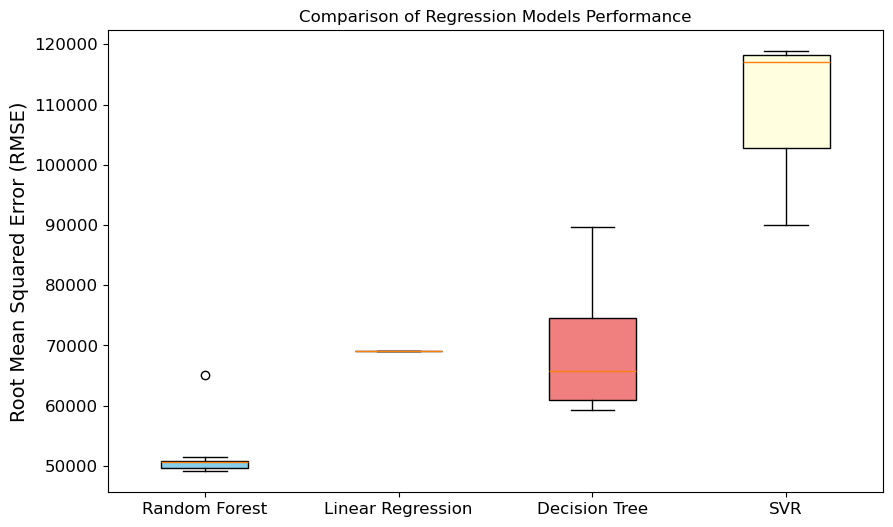

In [328]:
import matplotlib.pyplot as plt

# Results from RandomForestRegressor
rf_scores = [
    49117.55344336652, 51450.63202856348, 50692.53588182537, 50783.614493515,
    49162.89877456354, 50655.798471042704, 50513.856319990606, 49521.17201976928,
    50302.90440763418, 65167.02018649492
]

# Results from Linear Regressor
linear_scores = [
    69074.7083042563, 69166.26063702338, 69073.08159853352, 69074.18356426693,
    69166.50688682607, 69165.80439674595, 69165.13125117465, 69166.50739835862,
    69165.15162420971, 69166.43358431317
]

# Results from DecisionTreeRegressor
dt_scores = [
    68463.03382170892, 61325.73068220276, 60923.784542858106, 89690.35377873268,
    75843.79857045546, 59444.35421292752, 59372.80336861544, 86636.20686303898,
    63205.28140453373, 70829.76539492725
]

# Results from SVR
svr_scores = [
    98965.5619310196, 117386.52632114611, 118407.16551953567, 118841.04755485812,
    106043.237375218, 101764.5645056571, 118670.09522290176, 117755.60912245764,
    116617.4635732572, 90009.28826197074
]

# Combine all scores into a list
all_scores = [rf_scores, linear_scores, dt_scores, svr_scores]

# Box plot with different colors
plt.figure(figsize=(10, 6))
box = plt.boxplot(all_scores, patch_artist=True)

# Customize colors for each box plot
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding titles and labels
plt.xticks([1, 2, 3, 4], ['Random Forest', 'Linear Regression', 'Decision Tree', 'SVR'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Regression Models Performance')

# Show plot
plt.show()

In [ ]:
#Evaluating on the Test Set

In [305]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [307]:
final_rmse

85296.06124308237